# IMPORTING PYTHON PACKAGES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

C:\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# IMPORTING DATASET

In [2]:
df_fee=pd.read_excel('Final_Train.xlsx')
df_fee

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5932,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5933,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5934,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5935,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [3]:
df_fee['Qualification']=df_fee.Qualification.str.count(',') + 1
df_fee['Experience']=df_fee.Experience.str.replace("( ).*","")
df_fee['Rating']=df_fee.Rating.str.replace("%","")
df_fee['Place']=df_fee.Place.str.partition(",")[2]
df_fee.drop(df_fee.columns[[5]],axis=1,inplace=True)
df_fee

,Qualification,Experience,Rating,Place,Profile,Fees
0,2,24,100,Ernakulam,Homeopath,100
1,2,12,98,Bangalore,Ayurveda,350
2,2,9,NaN,Bangalore,ENT Specialist,300
3,2,12,NaN,Bangalore,Ayurveda,250
4,1,20,100,Chennai,Ayurveda,250
...,...,...,...,...,...,...
5932,2,19,98,Bangalore,ENT Specialist,300
5933,1,33,NaN,Chennai,General Medicine,100
5934,1,41,97,Delhi,General Medicine,600
5935,2,15,90,Mumbai,General Medicine,100


LABEL ENCODING

In [4]:
le=LabelEncoder()
list=['Place','Profile']
for val in list:
    df_fee[val]=le.fit_transform(df_fee[val].astype(str))
df_fee

,Qualification,Experience,Rating,Place,Profile,Fees
0,2,24,100,4,5,100
1,2,12,98,0,0,350
2,2,9,NaN,0,3,300
3,2,12,NaN,0,0,250
4,1,20,100,1,0,250
...,...,...,...,...,...,...
5932,2,19,98,0,3,300
5933,1,33,NaN,1,4,100
5934,1,41,97,3,4,600
5935,2,15,90,6,4,100


# EXPLORATORY DATA ANALYSIS 

In [5]:
df_fee.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,2,24,100,4,5,100
1,2,12,98,0,0,350
2,2,9,NaN,0,3,300
3,2,12,NaN,0,0,250
4,1,20,100,1,0,250


In [6]:
df_fee.tail()

,Qualification,Experience,Rating,Place,Profile,Fees
5932,2,19,98,0,3,300
5933,1,33,NaN,1,4,100
5934,1,41,97,3,4,600
5935,2,15,90,6,4,100
5936,2,17,100,3,1,200


In [7]:
df_fee.isnull().sum()

Qualification       0
Experience          0
Rating           3278
Place               0
Profile             0
Fees                0
dtype: int64

IMPUTER

In [8]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp = imp.fit(df_fee.values)
df=imp.transform(df_fee)
df_fee=pd.DataFrame(df)
df_fee

,0,1,2,3,4,5
0,2,24,100,4,5,100
1,2,12,98,0,0,350
2,2,9,100,0,3,300
3,2,12,100,0,0,250
4,1,20,100,1,0,250
...,...,...,...,...,...,...
5932,2,19,98,0,3,300
5933,1,33,100,1,4,100
5934,1,41,97,3,4,600
5935,2,15,90,6,4,100


In [9]:
df_fee.shape

(5937, 6)

In [10]:
df_fee.dtypes

0    object
1    object
2    object
3    object
4    object
5    object
dtype: object

In [11]:
df_fee[0] = df_fee[0].astype(float)
df_fee[1] = df_fee[1].astype(float)
df_fee[2] = df_fee[2].astype(float)
df_fee[3] = df_fee[3].astype(float)
df_fee[4] = df_fee[4].astype(float)
df_fee[5] = df_fee[5].astype(float)
df_fee.dtypes

0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
dtype: object

In [12]:
df_fee.columns

RangeIndex(start=0, stop=6, step=1)

In [13]:
df_fee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 6 columns):
0    5937 non-null float64
1    5937 non-null float64
2    5937 non-null float64
3    5937 non-null float64
4    5937 non-null float64
5    5937 non-null float64
dtypes: float64(6)
memory usage: 278.4 KB


In [14]:
df_fee.describe()

,0,1,2,3,4,5
count,5937.000000,5937.000000,5937.000000,5937.000000,5937.000000,5937.000000
mean,1.997642,17.373926,97.600977,3.059626,2.443658,308.785245
std,0.964146,11.110735,5.891450,2.296388,1.661124,190.846608
min,1.000000,0.000000,7.000000,0.000000,0.000000,5.000000
25%,1.000000,9.000000,98.000000,1.000000,1.000000,150.000000
50%,2.000000,15.000000,100.000000,3.000000,2.000000,300.000000
75%,2.000000,23.000000,100.000000,5.000000,4.000000,500.000000
max,10.000000,66.000000,100.000000,8.000000,5.000000,950.000000


Data in column 1 does not appear to have normal distribution. Data in all other columns appear to have normal distribution (mean very close to 50th percentile).

In [15]:
#sns.heatmap(df_fee.isnull(),annot=True)

In [16]:
df_fee.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

CHECKING DATA SKEWNESS

In [17]:
df_fee.skew()

0    1.431847
1    1.000122
2   -4.692227
3   -0.002876
4    0.105480
5    0.747800
dtype: float64

REMOVING DATA SKEWNESS

In [18]:
for col in df_fee.columns:
    if df_fee.skew().loc[col]>0.55:
        df_fee[col]=np.log1p(df_fee[col])
df_fee.skew()

0    0.388712
1   -0.768037
2   -4.692227
3   -0.002876
4    0.105480
5   -0.307388
dtype: float64

CHECKING OUTLIERS

In [19]:
z=np.abs(zscore(df_fee))
print(z.shape)
print(np.where(z>3))

(5937, 6)
(array([  18,   55,   58,   67,  139,  167,  177,  208,  290,  308,  332,
        376,  379,  382,  408,  457,  464,  583,  588,  599,  612,  628,
        636,  688,  726,  782,  783,  805,  810,  846,  848,  865,  906,
        913,  917,  940,  963,  968,  970,  974,  985,  993, 1010, 1012,
       1115, 1135, 1163, 1168, 1232, 1246, 1295, 1308, 1371, 1384, 1411,
       1417, 1425, 1429, 1436, 1462, 1467, 1539, 1545, 1552, 1584, 1585,
       1586, 1597, 1606, 1612, 1627, 1640, 1651, 1709, 1719, 1720, 1733,
       1735, 1735, 1739, 1770, 1788, 1817, 1844, 1861, 1869, 1871, 1902,
       1922, 1929, 2027, 2080, 2082, 2134, 2152, 2193, 2267, 2273, 2299,
       2313, 2380, 2467, 2489, 2537, 2552, 2574, 2608, 2626, 2630, 2635,
       2659, 2671, 2703, 2704, 2715, 2727, 2747, 2762, 2818, 2822, 2833,
       2839, 2935, 2951, 2957, 2980, 3079, 3082, 3108, 3113, 3114, 3132,
       3165, 3210, 3241, 3257, 3282, 3290, 3320, 3331, 3354, 3371, 3448,
       3453, 3484, 3487, 3511, 3522, 353

REMOVING OUTLIERS

In [20]:
df_final=df_fee.loc[(z<3).all(axis=1)]
print(df_final.shape)

(5695, 6)


BOXPLOT

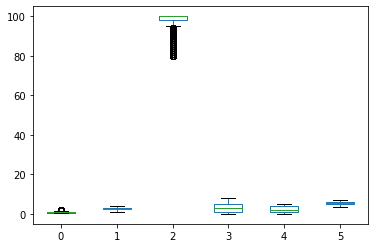

In [21]:
df_final.plot.box()

CORRELATION

In [22]:
df_final.corr()

,0,1,2,3,4,5
0,1.000000,0.067140,-0.180659,-0.045666,0.015609,0.243716
1,0.067140,1.000000,-0.144480,0.036631,0.187392,-0.017479
2,-0.180659,-0.144480,1.000000,0.069292,-0.004673,-0.146836
3,-0.045666,0.036631,0.069292,1.000000,-0.009230,-0.083598
4,0.015609,0.187392,-0.004673,-0.009230,1.000000,0.133340
5,0.243716,-0.017479,-0.146836,-0.083598,0.133340,1.000000


PAIRPLOT

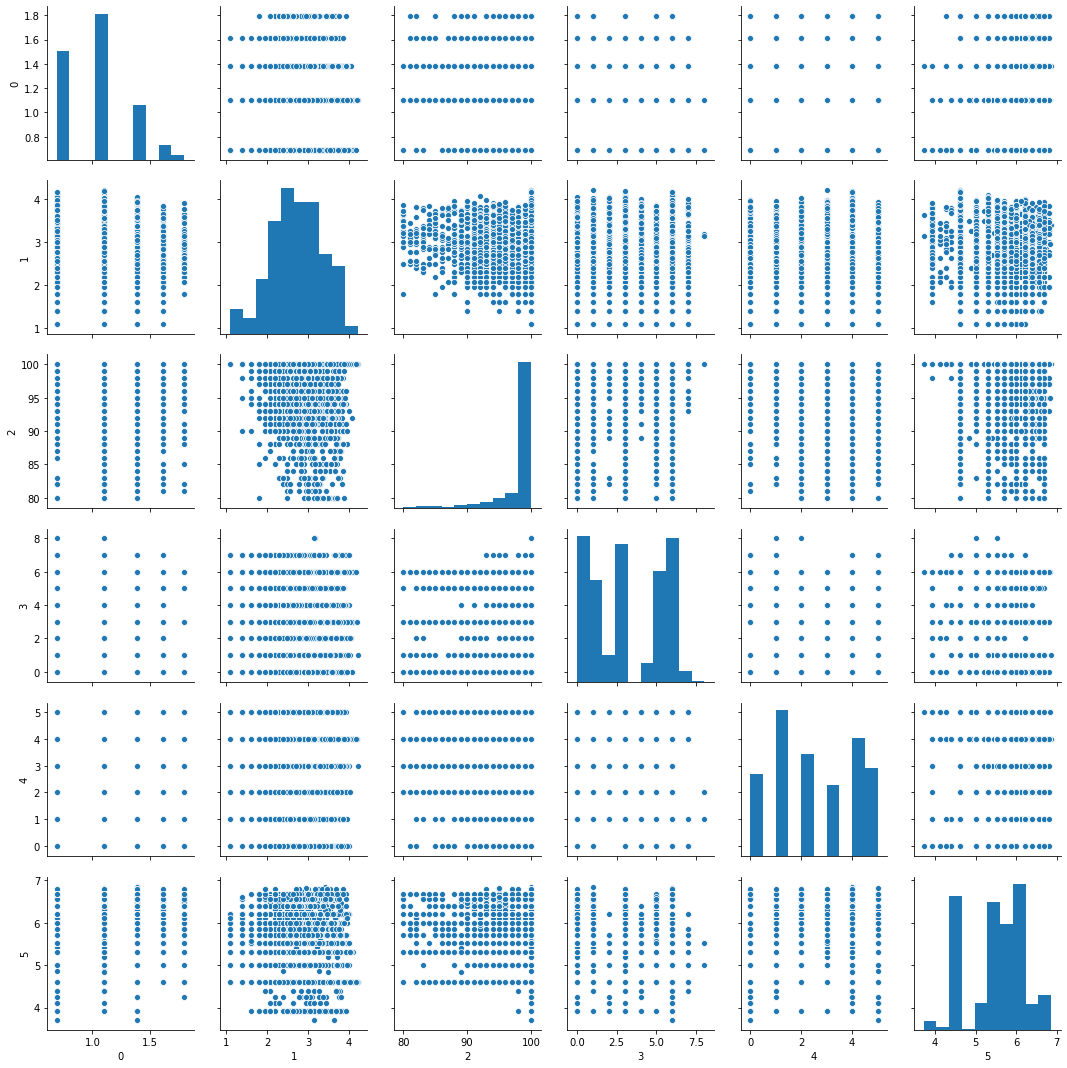

In [23]:
sns.pairplot(df_final)

# TRAIN AND TEST DATA

In [24]:
df_x=df_final.iloc[:,:-1]
print(df_x)
y=df_final.iloc[:,-1]
print(y)
print()
print(df_x.shape)
print(y.shape)

             0         1      2    3    4
0     1.098612  3.218876  100.0  4.0  5.0
1     1.098612  2.564949   98.0  0.0  0.0
2     1.098612  2.302585  100.0  0.0  3.0
3     1.098612  2.564949  100.0  0.0  0.0
4     0.693147  3.044522  100.0  1.0  0.0
...        ...       ...    ...  ...  ...
5932  1.098612  2.995732   98.0  0.0  3.0
5933  0.693147  3.526361  100.0  1.0  4.0
5934  0.693147  3.737670   97.0  3.0  4.0
5935  1.098612  2.772589   90.0  6.0  4.0
5936  1.098612  2.890372  100.0  3.0  1.0

[5695 rows x 5 columns]
0       4.615121
1       5.860786
2       5.707110
3       5.525453
4       5.525453
          ...   
5932    5.707110
5933    4.615121
5934    6.398595
5935    4.615121
5936    5.303305
Name: 5, Length: 5695, dtype: float64

(5695, 5)
(5695,)


In [25]:
x=df_x

# TRAINING AND TESTING - VARIOUS MODELS

FUNCTION DECLARATION

In [26]:
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.30)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("R2 Score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("Maximum R2 Score corresponds to ",final_r_state," is ",max_r_score)
    return(final_r_state)

LOGISTIC REGRESSION

In [27]:
lr=LinearRegression()
r_state=maxr2_score(lr,x,y)

R2 Score corresponding to  42  is  0.08979223884147125
R2 Score corresponding to  43  is  0.07027697954873247
R2 Score corresponding to  44  is  0.09041235100472345
R2 Score corresponding to  45  is  0.08402649715911548
R2 Score corresponding to  46  is  0.08695285972186939
R2 Score corresponding to  47  is  0.0673328478175349
R2 Score corresponding to  48  is  0.09312019591367249
R2 Score corresponding to  49  is  0.08884857202719931
R2 Score corresponding to  50  is  0.09435664709495584
R2 Score corresponding to  51  is  0.09208572004420268
R2 Score corresponding to  52  is  0.08402902360036224
R2 Score corresponding to  53  is  0.09597650565984839
R2 Score corresponding to  54  is  0.08930919024088946
R2 Score corresponding to  55  is  0.08914820124342648
R2 Score corresponding to  56  is  0.08526926651095057
R2 Score corresponding to  57  is  0.09296937987183662
R2 Score corresponding to  58  is  0.08158594310378531
R2 Score corresponding to  59  is  0.0918501390739287
R2 Score cor

In [28]:
print("Mean R2 Score for Linear Regression is ",cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring='r2').mean())
print("Standard Deviation in R2 Score for Linear Regression is ",cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring='r2').std())

Mean R2 Score for Linear Regression is  0.09381436802349541
Standard Deviation in R2 Score for Linear Regression is  0.009835489084171865


KNEIGHBORS REGRESSOR

In [29]:
neighbors={"n_neighbors":range(1,30)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=5)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 29}

In [30]:
knr=KNeighborsRegressor(n_neighbors=29)
r_state=maxr2_score(knr,x,y)

R2 Score corresponding to  42  is  0.1526180237632061
R2 Score corresponding to  43  is  0.12319324935910536
R2 Score corresponding to  44  is  0.14258497358527789
R2 Score corresponding to  45  is  0.15103404468116455
R2 Score corresponding to  46  is  0.19174054057480605
R2 Score corresponding to  47  is  0.15817821551026834
R2 Score corresponding to  48  is  0.17340198035409715
R2 Score corresponding to  49  is  0.16978242596798088
R2 Score corresponding to  50  is  0.1764033801722571
R2 Score corresponding to  51  is  0.14885633034505974
R2 Score corresponding to  52  is  0.17668490033116824
R2 Score corresponding to  53  is  0.15659924850897466
R2 Score corresponding to  54  is  0.15086908208957894
R2 Score corresponding to  55  is  0.16283291480464124
R2 Score corresponding to  56  is  0.15497118692580802
R2 Score corresponding to  57  is  0.17301214115422914
R2 Score corresponding to  58  is  0.1375092578358853
R2 Score corresponding to  59  is  0.188167429061753
R2 Score corres

In [31]:
print("Mean R2 Score for KNN Regression is ",cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for KNN Regression is ",cross_val_score(knr,x,y,cv=5,scoring='r2').std())

Mean R2 Score for KNN Regression is  0.16371097270941026
Standard Deviation in R2 Score for KNN Regression is  0.024202846464395758


LASSO REGRESSION

In [32]:
ls=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(ls,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001}

In [33]:
ls=Lasso(alpha=0.001)
r_state=maxr2_score(ls,x,y)

R2 Score corresponding to  42  is  0.08968088972582511
R2 Score corresponding to  43  is  0.07120433066765841
R2 Score corresponding to  44  is  0.09057137769062396
R2 Score corresponding to  45  is  0.08386224420417077
R2 Score corresponding to  46  is  0.08711003805605766
R2 Score corresponding to  47  is  0.06777981325457028
R2 Score corresponding to  48  is  0.09349270271207577
R2 Score corresponding to  49  is  0.08901942781631966
R2 Score corresponding to  50  is  0.09408887336937533
R2 Score corresponding to  51  is  0.09227894452318419
R2 Score corresponding to  52  is  0.08429581804103736
R2 Score corresponding to  53  is  0.09603376871439184
R2 Score corresponding to  54  is  0.0896603499713845
R2 Score corresponding to  55  is  0.08938121439053293
R2 Score corresponding to  56  is  0.08523695352189886
R2 Score corresponding to  57  is  0.09281486345306111
R2 Score corresponding to  58  is  0.08158121361320025
R2 Score corresponding to  59  is  0.0917955317872311
R2 Score cor

In [34]:
print("Mean R2 Score for Lasso Regression is ",cross_val_score(ls,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for Lasso Regression is ",cross_val_score(ls,x,y,cv=5,scoring="r2").std())

Mean R2 Score for Lasso Regression is  0.09378565039371327
Standard Deviation in R2 Score for Lasso Regression is  0.009738683277298625


RIDGE REGRESSION

In [35]:
rd=Ridge()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(rd,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'alpha': 1}

In [36]:
rd=Ridge(alpha=1)
r_state=maxr2_score(rd,x,y)

R2 Score corresponding to  42  is  0.08978417805300509
R2 Score corresponding to  43  is  0.07038470130700414
R2 Score corresponding to  44  is  0.09044221910797123
R2 Score corresponding to  45  is  0.08402735601464184
R2 Score corresponding to  46  is  0.08695462811676935
R2 Score corresponding to  47  is  0.06740420175920603
R2 Score corresponding to  48  is  0.09317127663897973
R2 Score corresponding to  49  is  0.08889417294081292
R2 Score corresponding to  50  is  0.09433923002195199
R2 Score corresponding to  51  is  0.09207447697038096
R2 Score corresponding to  52  is  0.08410278173049346
R2 Score corresponding to  53  is  0.09599237843046082
R2 Score corresponding to  54  is  0.0893638068059992
R2 Score corresponding to  55  is  0.08918031987298958
R2 Score corresponding to  56  is  0.08527455942103235
R2 Score corresponding to  57  is  0.09296470466849727
R2 Score corresponding to  58  is  0.08158662990366705
R2 Score corresponding to  59  is  0.09184020518806157
R2 Score co

In [37]:
print("Mean R2 Score for Ridge Regression is ",cross_val_score(rd,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for Ridge Regression is ",cross_val_score(rd,x,y,cv=5,scoring="r2").std())

Mean R2 Score for Ridge Regression is  0.09381451531380772
Standard Deviation in R2 Score for Ridge Regression is  0.0098240279080698


ELASTIC NET REGRESSION

In [38]:
enr=ElasticNet()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(enr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001}

In [39]:
enr=ElasticNet(alpha=0.001)
r_state=maxr2_score(enr,x,y)

R2 Score corresponding to  42  is  0.08972180296579235
R2 Score corresponding to  43  is  0.07095243300401533
R2 Score corresponding to  44  is  0.0905510941206481
R2 Score corresponding to  45  is  0.08394686596999235
R2 Score corresponding to  46  is  0.0870359992020695
R2 Score corresponding to  47  is  0.06769693399183152
R2 Score corresponding to  48  is  0.09340713175580939
R2 Score corresponding to  49  is  0.08902403078822063
R2 Score corresponding to  50  is  0.0941891174615771
R2 Score corresponding to  51  is  0.09216123020022993
R2 Score corresponding to  52  is  0.08430718313833307
R2 Score corresponding to  53  is  0.09603694841765387
R2 Score corresponding to  54  is  0.08959231631063869
R2 Score corresponding to  55  is  0.08932835873098022
R2 Score corresponding to  56  is  0.08526427055650976
R2 Score corresponding to  57  is  0.0928839613139355
R2 Score corresponding to  58  is  0.08158603722763147
R2 Score corresponding to  59  is  0.09180430960230412
R2 Score corre

In [40]:
print("Mean R2 Score for Elastic Net Regression is ",cross_val_score(enr,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for Elastic Net Regression is ",cross_val_score(enr,x,y,cv=5,scoring="r2").std())

Mean R2 Score for Elastic Net Regression is  0.0938010915518405
Standard Deviation in R2 Score for Elastic Net Regression is  0.00976149030232977


GRADIENT BOOSTING REGRESSOR

In [41]:
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 1000}

In [42]:
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=1000)
r_state=maxr2_score(gbr,x,y)

R2 Score corresponding to  42  is  0.18349791057061993
R2 Score corresponding to  43  is  0.16318886158695778
R2 Score corresponding to  44  is  0.1933663885686152
R2 Score corresponding to  45  is  0.20133333099657724
R2 Score corresponding to  46  is  0.2071181941665693
R2 Score corresponding to  47  is  0.1667609603221467
R2 Score corresponding to  48  is  0.1959827844860912
R2 Score corresponding to  49  is  0.20280833536827603
R2 Score corresponding to  50  is  0.19735134832675205
R2 Score corresponding to  51  is  0.16909515889708837
R2 Score corresponding to  52  is  0.19402698337505153
R2 Score corresponding to  53  is  0.19069749908964906
R2 Score corresponding to  54  is  0.17795438183443035
R2 Score corresponding to  55  is  0.19671642697713343
R2 Score corresponding to  56  is  0.1984901024850907
R2 Score corresponding to  57  is  0.1977138192319876
R2 Score corresponding to  58  is  0.18331634022725585
R2 Score corresponding to  59  is  0.21024113425160884
R2 Score corresp

In [43]:
print("Mean R2 Score for Gradient Boosting Regressor is ",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for Gradient Boosting Regressor is ",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())

Mean R2 Score for Gradient Boosting Regressor is  0.19967014372367814
Standard Deviation in R2 Score for Gradient Boosting Regressor is  0.011682731093596098


ADA BOOST REGRESSOR

In [44]:
from sklearn.tree import DecisionTreeRegressor
abr=AdaBoostRegressor()
dtr=DecisionTreeRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000],"base_estimator":[lr,ls,dtr]}
clf=GridSearchCV(abr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'base_estimator': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 'learning_rate': 0.1,
 'n_estimators': 10}

In [45]:
abr=AdaBoostRegressor(base_estimator=lr,learning_rate=0.01,n_estimators=10)
r_state=maxr2_score(abr,x,y)

R2 Score corresponding to  42  is  0.08954022607897316
R2 Score corresponding to  43  is  0.0702510225452434
R2 Score corresponding to  44  is  0.0902138816842406
R2 Score corresponding to  45  is  0.08471889118572684
R2 Score corresponding to  46  is  0.08691076695562516
R2 Score corresponding to  47  is  0.06764880089936753
R2 Score corresponding to  48  is  0.09151323648228438
R2 Score corresponding to  49  is  0.08873727709203671
R2 Score corresponding to  50  is  0.09351987368665005
R2 Score corresponding to  51  is  0.09001515299801177
R2 Score corresponding to  52  is  0.08253121031849442
R2 Score corresponding to  53  is  0.09607075429599587
R2 Score corresponding to  54  is  0.08978938045499463
R2 Score corresponding to  55  is  0.08898129144135802
R2 Score corresponding to  56  is  0.08438782524569222
R2 Score corresponding to  57  is  0.09285482652048227
R2 Score corresponding to  58  is  0.0810185216164675
R2 Score corresponding to  59  is  0.0918908471065163
R2 Score corre

In [46]:
print("Mean R2 Score for ADA Boost Regressor is ",cross_val_score(abr,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for ADA Boost Regressor is ",cross_val_score(abr,x,y,cv=5,scoring="r2").std())

Mean R2 Score for ADA Boost Regressor is  0.09431728663711196
Standard Deviation in R2 Score for ADA Boost Regressor is  0.01061057572958457


# BEST MODEL

R2 SCORE AND RMSE

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=90,test_size=0.30)
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)
print("R2 Score is ",r2_score(y_test,y_pred))
print("RMSE is ",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score is  0.21683397227747903
RMSE is  0.5911409227929747


CROSS VALIDATION

In [48]:
score=cross_val_score(gbr,x,y,cv=5)
print('Score is ',score)
print('Mean Score is ', score.mean())
print('Standard Deviation is ',score.std())

Score is  [0.18479292 0.18738632 0.20852752 0.19902647 0.21790704]
Mean Score is  0.199528054141107
Standard Deviation is  0.012518586727901768


# PICKLE 

In [49]:
joblib.dump(gbr,'doctor.pkl')

['doctor.pkl']